In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
column_names = ['User_id','Moive_id','rating','time','Movie_title','Tips']
rating = pd.read_csv("rating.csv",header = None,names = column_names)

<Axes: >

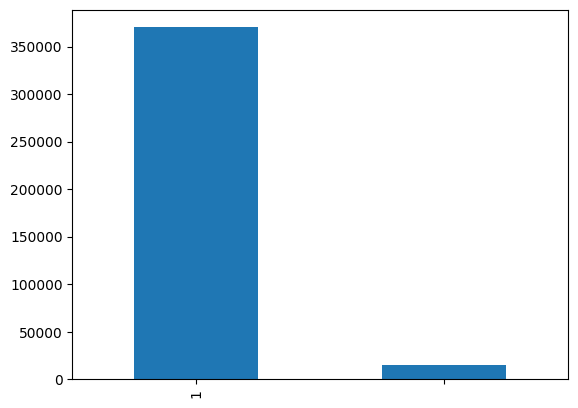

In [3]:
rating['TV_Series'] = rating.apply(lambda x: 1 if pd.isna(x['Tips'])==True else '',axis=1)
rating['TV_Series'].value_counts().plot(kind='bar')

In [4]:
rating = rating.drop('Tips',axis = 1)

去空

In [5]:
rating = rating[~rating['TV_Series'].isin([''])]
rating = rating[~rating['rating'].isin([''])]
rating = rating.drop('TV_Series',axis =1)
rating = rating.dropna()
print(rating)

           User_id   Moive_id  rating              time  \
0        ur2419668  tt7440726     2.0   19 January 2021   
1        ur2419668  tt7090140     7.0      15 June 2020   
2        ur2419668  tt3881784     7.0   6 December 2017   
3        ur2419668  tt4207112     7.0  17 November 2017   
4        ur2419668  tt4468740     9.0  12 November 2017   
...            ...        ...     ...               ...   
385636  ur73645337  tt0102685     8.0      14 June 2019   
385637  ur73645337  tt0425112     9.0      14 June 2019   
385638  ur73645337  tt1477834     6.0      14 June 2019   
385639  ur73645337  tt4425200     7.0      20 June 2017   
385640  ur73645337  tt6333284     7.0      20 June 2017   

                            Movie_title  
0                            Your Honor  
1                                  Coda  
2                              Stronger  
3       Score: A Film Music Documentary  
4                          Paddington 2  
...                                 ...

In [6]:
user_count = rating['User_id'].nunique()
print("number of users", user_count)
Movie_count = rating['Moive_id'].nunique()
print("number of movies", Movie_count)

number of users 1054
number of movies 67332


时间格式转化

In [7]:
import datetime
rating['Timestamp'] = rating['time'].apply(lambda x:datetime.datetime.strptime(x,'%d %B %Y'))
rating = rating.reset_index(drop=True)
print(rating)

           User_id   Moive_id  rating              time  \
0        ur2419668  tt7440726     2.0   19 January 2021   
1        ur2419668  tt7090140     7.0      15 June 2020   
2        ur2419668  tt3881784     7.0   6 December 2017   
3        ur2419668  tt4207112     7.0  17 November 2017   
4        ur2419668  tt4468740     9.0  12 November 2017   
...            ...        ...     ...               ...   
324484  ur73645337  tt0102685     8.0      14 June 2019   
324485  ur73645337  tt0425112     9.0      14 June 2019   
324486  ur73645337  tt1477834     6.0      14 June 2019   
324487  ur73645337  tt4425200     7.0      20 June 2017   
324488  ur73645337  tt6333284     7.0      20 June 2017   

                            Movie_title  Timestamp  
0                            Your Honor 2021-01-19  
1                                  Coda 2020-06-15  
2                              Stronger 2017-12-06  
3       Score: A Film Music Documentary 2017-11-17  
4                         

In [8]:
print(rating['Timestamp'].dtype)

datetime64[ns]


抽取特征

前i天的平均评分

In [9]:
for index,rows in rating.iterrows():
    print(index)
    print(rows)
    print(rating.iloc[index,0])
    break

0
User_id                  ur2419668
Moive_id                 tt7440726
rating                         2.0
time               19 January 2021
Movie_title             Your Honor
Timestamp      2021-01-19 00:00:00
Name: 0, dtype: object
ur2419668


In [92]:
rating_s = rating.loc[:,['User_id','Timestamp','rating']]
rating_s['rating'] = rating_s['rating'].astype('int8')

In [11]:
def getHistory(index,i):
    temp = rating.iloc[index,5]
    id = rating.iloc[index,0]
    delta = datetime.timedelta(days=i)
    end_date = temp - delta
    rating_slice = rating_s.iloc[index+1:,:]
    rating_slice = rating_slice[rating_slice['User_id']==id]
    rating_slice = rating_slice[rating_slice['Timestamp']>=end_date]
    return rating_slice['rating'].mean()
   

In [12]:
movie_rating = pd.read_csv("data.tsv",sep = "\t",names = ['Moive_id','avg_rating','numVotes'],header = 0)
print(movie_rating)

          Moive_id  avg_rating  numVotes
0        tt0000001         5.7      1967
1        tt0000002         5.8       263
2        tt0000003         6.5      1803
3        tt0000004         5.6       179
4        tt0000005         6.2      2603
...            ...         ...       ...
1295014  tt9916730         8.3        10
1295015  tt9916766         7.0        21
1295016  tt9916778         7.2        36
1295017  tt9916840         8.8         6
1295018  tt9916880         8.2         6

[1295019 rows x 3 columns]


In [13]:
def getAvgR(movie_id,m,n):
    if m == n or m==n-1:
        if movie_id == movie_rating.iloc[m,0]:
            return movie_rating.iloc[m,1]
        elif movie_id == movie_rating.iloc[n,0]:
            return movie_rating.iloc[n,1]
        else: return -1
    else:
        if movie_id[2:9] < movie_rating.iloc[round((m+n)/2),0][2:9]:
            return getAvgR(movie_id,m,round((m+n)/2))
        elif movie_id[2:9] > movie_rating.iloc[round((m+n)/2),0][2:9]:
            return getAvgR(movie_id,round((m+n)/2),n)
        else:
            if movie_id == movie_rating.iloc[round((m+n)/2),0]:
                return movie_rating.iloc[round((m+n)/2),1]

In [15]:
rating['avg_rating'] = rating['Moive_id'].apply(lambda x: getAvgR(x,0,1295018))

In [16]:
print(rating)

           User_id   Moive_id  rating              time  \
0        ur2419668  tt7440726     2.0   19 January 2021   
1        ur2419668  tt7090140     7.0      15 June 2020   
2        ur2419668  tt3881784     7.0   6 December 2017   
3        ur2419668  tt4207112     7.0  17 November 2017   
4        ur2419668  tt4468740     9.0  12 November 2017   
...            ...        ...     ...               ...   
324484  ur73645337  tt0102685     8.0      14 June 2019   
324485  ur73645337  tt0425112     9.0      14 June 2019   
324486  ur73645337  tt1477834     6.0      14 June 2019   
324487  ur73645337  tt4425200     7.0      20 June 2017   
324488  ur73645337  tt6333284     7.0      20 June 2017   

                            Movie_title  Timestamp  avg_rating  
0                            Your Honor 2021-01-19         7.6  
1                                  Coda 2020-06-15         6.0  
2                              Stronger 2017-12-06         6.9  
3       Score: A Film Music Doc

In [17]:
df = pd.Series(rating.index)
rating['history1'] = df.apply(lambda x: getHistory(x,1))


In [18]:
rating['history3'] = df.apply(lambda x: getHistory(x,3))

In [19]:
rating['history7'] = df.apply(lambda x: getHistory(x,7))

In [20]:
rating['history15'] = df.apply(lambda x: getHistory(x,15))

In [21]:
rating['history30'] = df.apply(lambda x: getHistory(x,30))

In [22]:
print(rating)

           User_id   Moive_id  rating              time  \
0        ur2419668  tt7440726     2.0   19 January 2021   
1        ur2419668  tt7090140     7.0      15 June 2020   
2        ur2419668  tt3881784     7.0   6 December 2017   
3        ur2419668  tt4207112     7.0  17 November 2017   
4        ur2419668  tt4468740     9.0  12 November 2017   
...            ...        ...     ...               ...   
324484  ur73645337  tt0102685     8.0      14 June 2019   
324485  ur73645337  tt0425112     9.0      14 June 2019   
324486  ur73645337  tt1477834     6.0      14 June 2019   
324487  ur73645337  tt4425200     7.0      20 June 2017   
324488  ur73645337  tt6333284     7.0      20 June 2017   

                            Movie_title  Timestamp  avg_rating  history1  \
0                            Your Honor 2021-01-19         7.6       NaN   
1                                  Coda 2020-06-15         6.0       NaN   
2                              Stronger 2017-12-06         6.9 

In [86]:
def getLast(index,i):
    id = rating.iloc[index,0]
    rating_slice = rating_s.iloc[index+1:,:]
    rating_slice = rating_slice[rating_slice['User_id']==id]
    return rating_slice.iloc[0:i,2].mean()

In [68]:
df = pd.Series(rating.index)
rating['last1'] = df.apply(lambda x: getLast(x,1))
print("1")
rating['last3'] = df.apply(lambda x: getLast(x,3))
print("2")
rating['last5'] = df.apply(lambda x: getLast(x,5))



1
2


In [93]:
df = pd.Series(rating.index)
rating['last7'] = df.apply(lambda x: getLast(x,7))

In [62]:
a = rating[['User_id','rating','last1']]
print(a.iloc[:100,:])

      User_id  rating  last1
0   ur2419668     2.0    7.0
1   ur2419668     7.0    7.0
2   ur2419668     7.0    8.0
3   ur2419668     7.0    8.0
4   ur2419668     9.0    8.0
..        ...     ...    ...
95  ur2419668     7.0    8.0
96  ur2419668     8.0    8.0
97  ur2419668     8.0    7.0
98  ur2419668     8.0    6.5
99  ur2419668     6.0    8.0

[100 rows x 3 columns]


Series([], Name: last1, dtype: float64)


In [94]:
rating.to_csv('rating_result11.csv', index = False)

In [65]:
rating = pd.read_csv("rating_result11.csv")

In [66]:
print(rating.shape)

(324489, 17)


In [67]:
rating.fillna(0, inplace=True)

<Axes: >

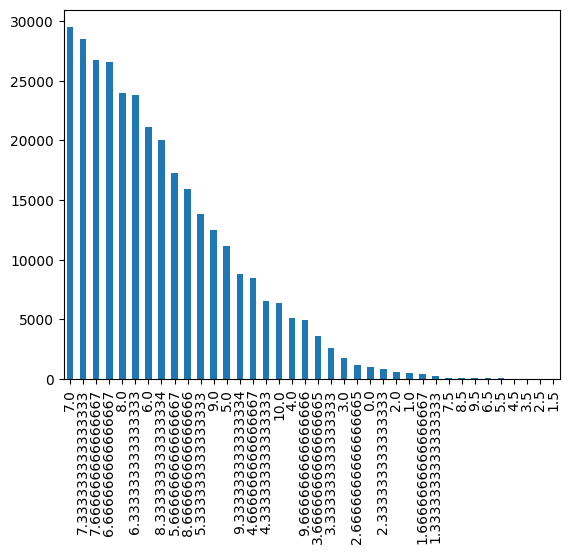

In [68]:
rating['last3'].value_counts().plot(kind='bar')

In [72]:
counts = rating.groupby('User_id')['rating'].nunique()
malicious_ids = counts[counts <= 2].index.tolist()
rating = rating[~rating['User_id'].isin(malicious_ids)]

In [73]:
print(rating.shape)

(324159, 17)


In [101]:
print(rating)

           User_id   Moive_id  rating              time  \
0        ur2419668  tt7440726     2.0   19 January 2021   
1        ur2419668  tt7090140     7.0      15 June 2020   
2        ur2419668  tt3881784     7.0   6 December 2017   
3        ur2419668  tt4207112     7.0  17 November 2017   
4        ur2419668  tt4468740     9.0  12 November 2017   
...            ...        ...     ...               ...   
324484  ur73645337  tt0102685     8.0      14 June 2019   
324485  ur73645337  tt0425112     9.0      14 June 2019   
324486  ur73645337  tt1477834     6.0      14 June 2019   
324487  ur73645337  tt4425200     7.0      20 June 2017   
324488  ur73645337  tt6333284     7.0      20 June 2017   

                            Movie_title   Timestamp  avg_rating  history1  \
0                            Your Honor  2021-01-19         7.6       0.0   
1                                  Coda  2020-06-15         6.0       0.0   
2                              Stronger  2017-12-06         

In [64]:
X = rating[['avg_rating','history1','history3','history7','history15','history30','last1','last3','last5','last7']]
y = rating['rating']

In [47]:
X = rating[['avg_rating','history15','last5']]
y = rating['rating']

In [105]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.24 (+/- 0.02)


In [74]:
rating['perference'] = rating['rating'] > rating['avg_rating']
rating['perference'] = rating['perference'].astype(int)

In [75]:
X = rating[['avg_rating','history1','history3','history7','history15','history30','last1','last3','last5','last7']]
y = rating['perference']

In [76]:
y.value_counts()

1    189565
0    134594
Name: perference, dtype: int64

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

Validation accuracy is 0.500108


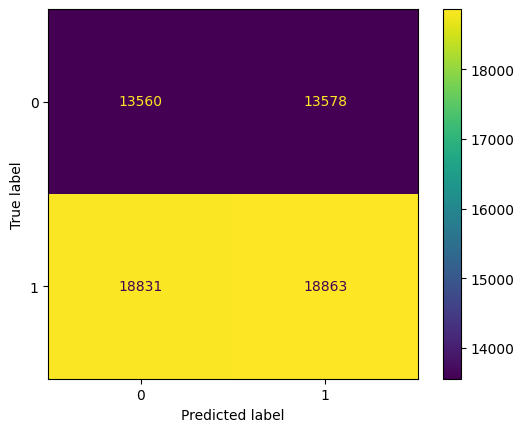

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

Y_basetest = np.random.randint(low=0,high=2,size=X_test.shape[0])
cm = confusion_matrix(Y_test, Y_basetest, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
print('Validation accuracy is %f' %accuracy_score(Y_test, Y_basetest))
disp.plot()
plt.show()

Validation accuracy is 0.652810


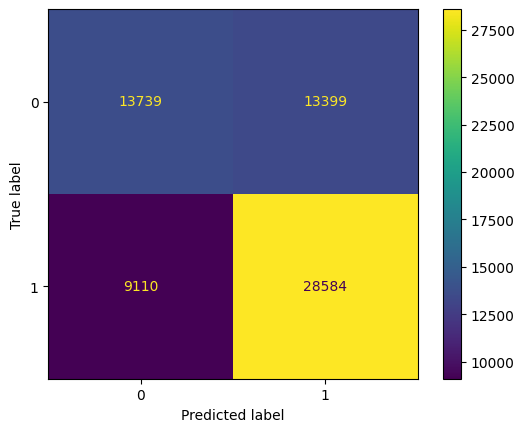

In [91]:

clf = RandomForestClassifier(max_depth=13,n_estimators=9,random_state=1)
clf = clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
cm = confusion_matrix(Y_test, Y_predTest, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
print('Validation accuracy is %f' %accuracy_score(Y_test, Y_predTest))
disp.plot()
plt.show()


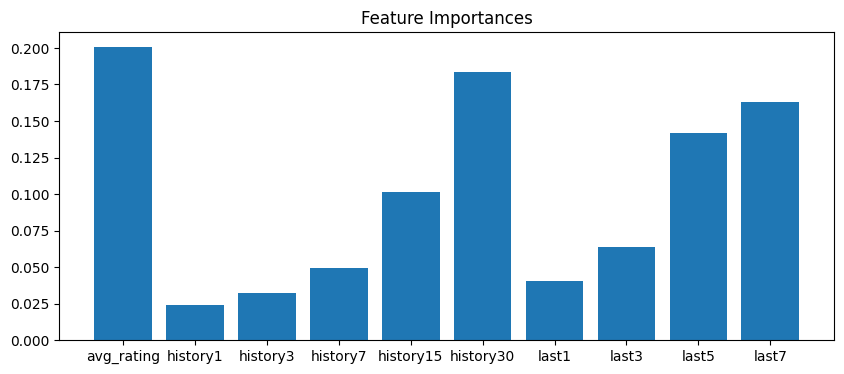

In [92]:
feature_importances = clf.feature_importances_
feature_names = [f'{i}' for i in ['avg_rating','history1','history3','history7','history15','history30','last1','last3','last5','last7']]
fig = plt.figure(figsize=(10, 4))
plt.bar(feature_names, feature_importances)
plt.title('Feature Importances')
plt.show()

In [18]:
print(rating)

           User_id   Moive_id  rating              time  \
0        ur2419668  tt7440726     2.0   19 January 2021   
1        ur2419668  tt7090140     7.0      15 June 2020   
2        ur2419668  tt3881784     7.0   6 December 2017   
3        ur2419668  tt4207112     7.0  17 November 2017   
4        ur2419668  tt4468740     9.0  12 November 2017   
...            ...        ...     ...               ...   
324484  ur73645337  tt0102685     8.0      14 June 2019   
324485  ur73645337  tt0425112     9.0      14 June 2019   
324486  ur73645337  tt1477834     6.0      14 June 2019   
324487  ur73645337  tt4425200     7.0      20 June 2017   
324488  ur73645337  tt6333284     7.0      20 June 2017   

                            Movie_title   Timestamp  avg_rating  history1  \
0                            Your Honor  2021-01-19         7.6       0.0   
1                                  Coda  2020-06-15         6.0       0.0   
2                              Stronger  2017-12-06         

Text(0, 0.5, 'corr with perference')

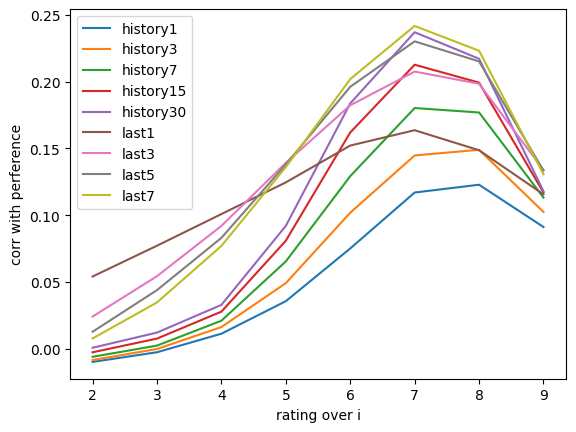

In [93]:
x = [2,3,4,5,6,7,8,9]
labels = ['history1','history3','history7','history15','history30','last1','last3','last5','last7']
for label in labels:
    cols = ['perference']
    for i in range(2,10):
        col = label + " to " +str(i)
        cols.append(col)
        rating[col] = rating[col[:-5]] >i
        rating[col] = rating[col].astype(int)
    data = rating[cols]
    corr_matrix = data.corr()
    plt.plot(x,corr_matrix.iloc[0,1:],label = label)
    plt.legend()
plt.xlabel("rating over i")
plt.ylabel("corr with perference")



<Axes: >

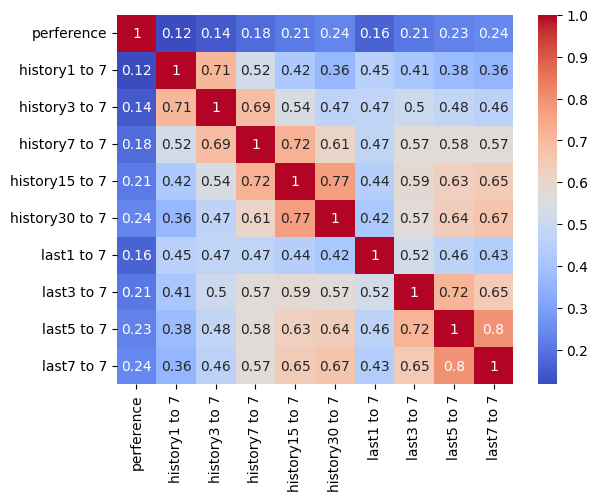

In [94]:
import seaborn as sns
i = 7
col1 = "history1 to " + str(i)
col2 = "history3 to " + str(i)
col3 = "history7 to " + str(i)
col4 = "history15 to " + str(i)
col5 = "history30 to " + str(i)
col6 = 'last1 to ' + str(i)
col7 = 'last3 to ' + str(i)
col8 = 'last5 to ' + str(i)
col9 = 'last7 to ' + str(i)
cols = [col1,col2,col3,col4,col5,col6,col7,col8,col9]
for col in cols:
    rating[col] = rating[col[:-5]] > i
    rating[col] = rating[col].astype(int)
data = rating[['perference',col1,col2,col3,col4,col5,col6,col7,col8,col9]]
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [61]:
X = rating[['avg_rating','history30','last7']]
y = rating['rating']

In [52]:
from sklearn.metrics import r2_score

r2 = r2_score(X['avg_rating'], y)
print('Baseline accuracy:', r2)

Baseline accuracy: -1.12047771028557


In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
model = LinearRegression()
scores = -1 *cross_val_score(model, X, y, cv=5,scoring='neg_mean_squared_error')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 3.70 (+/- 0.70)
